
Peak Fitting Results:

Peak 1 (Position: -576.83 ± 0.02):
Amplitude: 0.996 ± 0.002
Width: 13.97 ± 0.04 in ppm
Width: 1838.20 ± 4.97 in Hz
Eta: 0.22 ± 0.01
Offset: 208.596 ± 994425.596
Gaussian Area: 11.58 ± 0.19
Lorentzian Area: 4.77 ± 0.28
Total Area: 16.35 ± 0.34
--------------------------------------------------

Peak 2 (Position: -595.46 ± 0.04):
Amplitude: 0.396 ± 0.002
Width: 15.50 ± 0.09 in ppm
Width: 2038.93 ± 12.48 in Hz
Eta: 0.00 ± 0.03
Offset: -208.599 ± 994425.596
Gaussian Area: 6.53 ± 0.21
Lorentzian Area: 0.00 ± 0.31
Total Area: 6.53 ± 0.38
--------------------------------------------------
Peak 1 Percentage is 71.44% ± 2.15%
Peak 2 Percentage is 28.56% ± 1.76%
Overall Percentage is 100.00% ± 2.78%


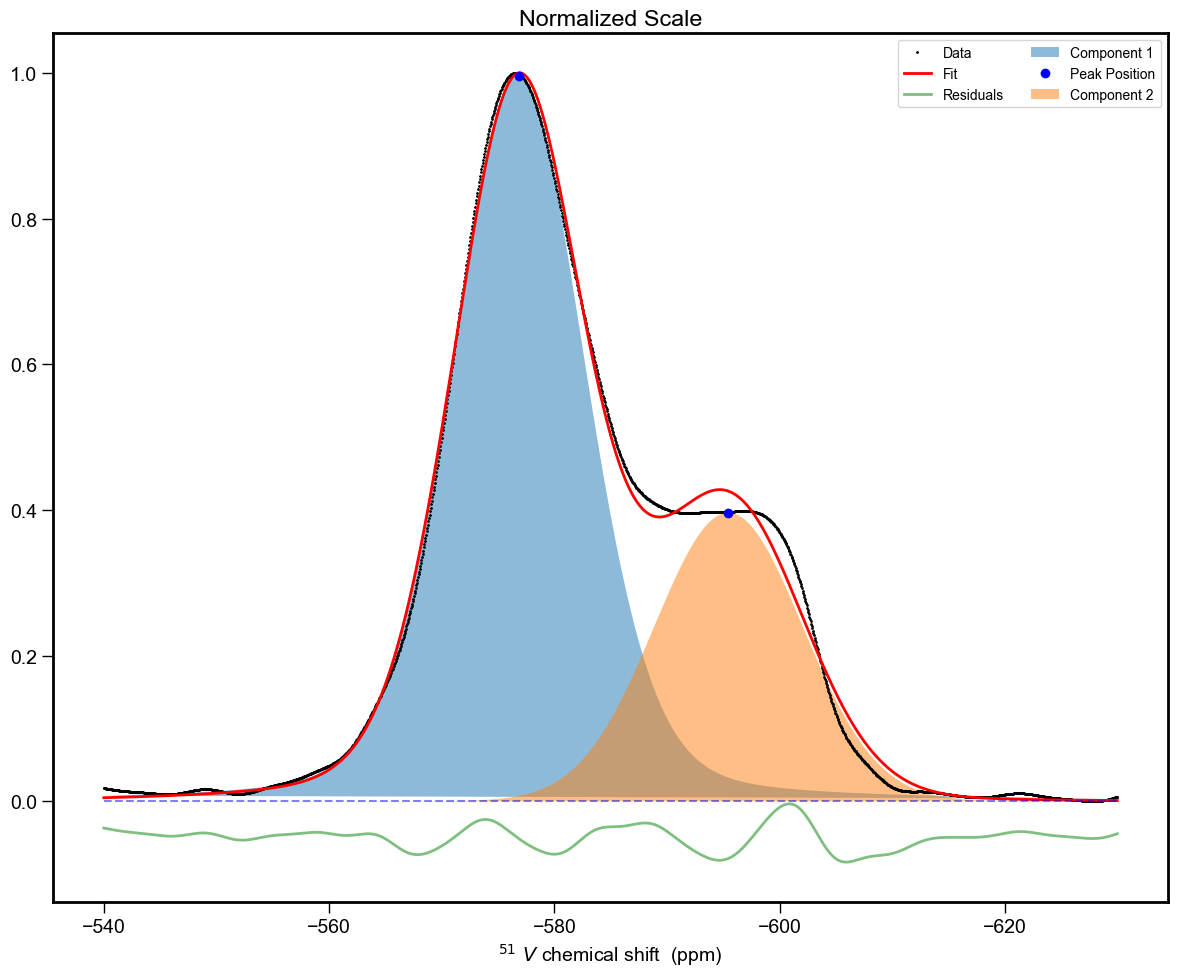

In [4]:
import sys
import matplotlib.pyplot as plt
sys.path.append("../../src")
from nmrlineshapeanalyser.core import NMRProcessor

#create NMRProcessor object

processor = NMRProcessor()

#Load filepath
filepath = r"..\..\data\two_peaks\2\pdata\1"


# Load the data

processor.load_data(filepath)

#Select the region of interest

x_data, y_data = processor.select_region(-630, -540)

#Normalize the data and return normalised y_axis and the corresponding x_axis

x_data, y_normalized = processor.normalize_data(x_data, y_data)

#define initial parameters for the fitting
#this example is for a single peak
#format of the parameters is [x0, amplitude, width, eta, offset]
# x0 (position), amplitude, width, eta (mixing parameter), offset
#x0 has to be close to the peak position
initial_params = [
                  -576.4, 0.12, 40.51, 0.89, -143.115, 
                  -597, 0.12, 40.51, 0.89, -143.115
                  ]

number_of_peaks = 2
# fixed_x0 controls whether peak positions should be fixed during fitting
# False means position can vary, True means position is fixed

fixed_x0 = [False]*number_of_peaks

#alternatively as:

# fixed_x0 = [False, False]


#FIt the data
popt, metrics, fitted = processor.fit_peaks(x_data, y_normalized, initial_params, fixed_x0)

#popt is the optimized parameters
#metrics is the metrics of the fitting
#fitted is the fitted curve data

#Plot and examine the results of the fitting
fig, axes, components = processor.plot_results(x_data, y_normalized, fitted, popt)

#Save the figure as an png file and the results as a csv file
processor.save_results(filepath, x_data, y_normalized, fitted, metrics, popt, components)